<a href="https://colab.research.google.com/github/Tea-Yeon-Kim/AI-Class/blob/main/week10/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# DNN 모델 구성
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),           # 784로 펼치기
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# 컴파일 및 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8609 - loss: 0.4738 - val_accuracy: 0.9596 - val_loss: 0.1363
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9646 - loss: 0.1179 - val_accuracy: 0.9668 - val_loss: 0.1085
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9770 - loss: 0.0750 - val_accuracy: 0.9613 - val_loss: 0.1277
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9816 - loss: 0.0586 - val_accuracy: 0.9722 - val_loss: 0.0984
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 0.9742 - val_loss: 0.0903


In [5]:
# 평가
loss, acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9704 - loss: 0.1028
Test accuracy: 0.9745


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


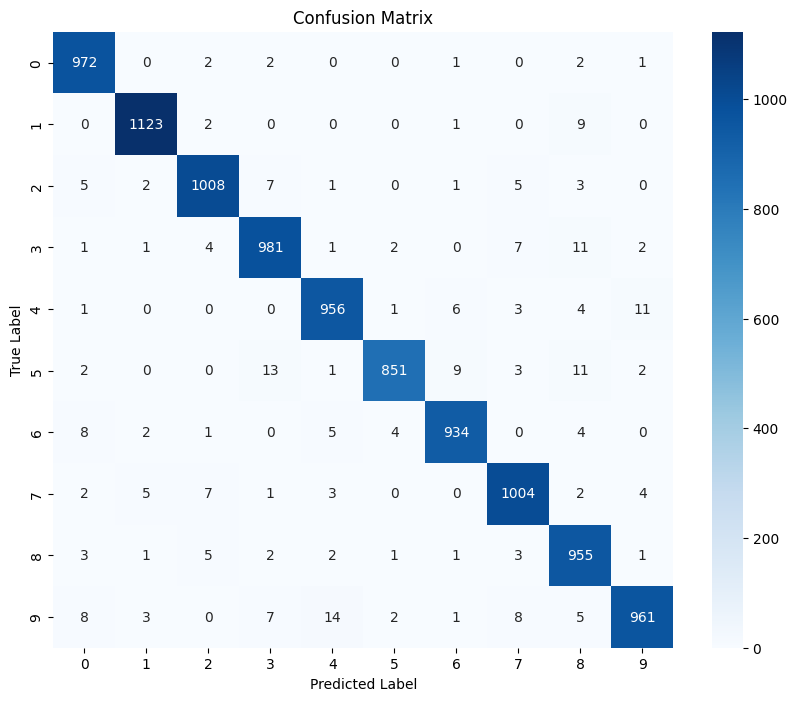

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.95      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.95      0.98      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [6]:
# 1. 모델 예측 (argmax를 써서 label 형태로 변환)
y_pred = model.predict(test_images)  # CNN이면 x_test shape는 (num, 28, 28, 1) 이어야 함
y_pred_labels = np.argmax(y_pred, axis=1)

# 2. 실제 라벨
y_true = test_labels  # 이미 정수형 라벨이면 그대로 사용 가능

# 3. Confusion Matrix 계산
cm = confusion_matrix(y_true, y_pred_labels)

# 4. 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 5. Precision, Recall, F1-score도 보고 싶다면
print(classification_report(y_true, y_pred_labels))